In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download -d ashkhagan/figshare-brain-tumor-dataset

100% 837M/839M [00:09<00:00, 130MB/s]
100% 839M/839M [00:09<00:00, 88.7MB/s]


In [ ]:
! unzip figshare-brain-tumor-dataset.zip

Archive:  figshare-brain-tumor-dataset.zip
  inflating: dataset/README.txt      
  inflating: dataset/cvind.mat       
  inflating: dataset/data/1.mat      
  inflating: dataset/data/10.mat     
  inflating: dataset/data/100.mat    
  inflating: dataset/data/1000.mat   
  inflating: dataset/data/1001.mat   
  inflating: dataset/data/1002.mat   
  inflating: dataset/data/1003.mat   
  inflating: dataset/data/1004.mat   
  inflating: dataset/data/1005.mat   
  inflating: dataset/data/1006.mat   
  inflating: dataset/data/1007.mat   
  inflating: dataset/data/1008.mat   
  inflating: dataset/data/1009.mat   
  inflating: dataset/data/101.mat    
  inflating: dataset/data/1010.mat   
  inflating: dataset/data/1011.mat   
  inflating: dataset/data/1012.mat   
  inflating: dataset/data/1013.mat   
  inflating: dataset/data/1014.mat   
  inflating: dataset/data/1015.mat   
  inflating: dataset/data/1016.mat   
  inflating: dataset/data/1017.mat   
  inflating: dataset/data/1018.mat   
  infla

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Activation,Input,Conv2D,Flatten,MaxPool2D,BatchNormalization
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Input,Concatenate
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import cv2
from tensorflow import keras

In [ ]:
datadir="/content/dataset/data"
N=3064
traindata=[]

for i in range(1,N+1):
    filename=str(i)+".mat"
    data=h5py.File(os.path.join(datadir,filename),"r")
    traindata.append(data)

    if i%100==0:
      print(filename)

100.mat
200.mat
300.mat
400.mat
500.mat
600.mat
700.mat
800.mat
900.mat
1000.mat
1100.mat
1200.mat
1300.mat
1400.mat
1500.mat
1600.mat
1700.mat
1800.mat
1900.mat
2000.mat
2100.mat
2200.mat
2300.mat
2400.mat
2500.mat
2600.mat
2700.mat
2800.mat
2900.mat
3000.mat


In [ ]:
import random

random.shuffle(traindata)

In [ ]:
train_images = []
train_labels = []
test_images = []
test_labels = []
temp=round(4*3064/5)

for i in range(temp):
  img = traindata[i]["cjdata"]["image"]
  if img.shape==(512,512):
    img=np.expand_dims(img,axis=2)
    train_images.append(img)
    lbl = traindata[i]["cjdata"]["label"]
    label=int(lbl[0])-1
    train_labels.append(label)

for i in range(temp,3064):
  img = traindata[i]["cjdata"]["image"]
  if img.shape==(512,512):
    img=np.expand_dims(img,axis=2)
    test_images.append(img)
    lbl = traindata[i]["cjdata"]["label"]
    label=int(lbl[0])-1
    test_labels.append(label) 

In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
image_size = [512,512]

In [ ]:
ini_input=keras.Input(shape=(512,512,1),name="image")

x1=layers.Conv2D(64,(22,22),strides=2)(ini_input)
x1=layers.MaxPooling2D((4,4))(x1)
x1=layers.BatchNormalization()(x1)

x2=layers.Conv2D(128,(11,11),strides=2,padding="same")(x1)
x2=layers.MaxPooling2D((2,2))(x2)
x2=layers.BatchNormalization()(x2)

x3=layers.Conv2D(256,(7,7),strides=2,padding="same")(x2)
x3=layers.MaxPooling2D((2,2))(x3)
x3=layers.BatchNormalization()(x3)

x4=layers.Conv2D(512,(3,3),strides=2,padding="same")(x3)
x4=layers.Flatten()(x4)
x4=layers.Activation("relu")(x4)

x5=layers.Dense(1024,"relu")(x4)

x6=layers.Dense(256,"relu")(x5)

x7=layers.Dense(512,"relu")(x6)

x9=layers.Dense(3)(x7)
pred=layers.Activation("softmax")(x9)


In [ ]:
model = keras.Model(inputs=ini_input,outputs=pred)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 512, 512, 1)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 246, 246, 64)      31040     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 31, 31, 128)       991360    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 128)      0     

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
r = model.fit(train_images,train_labels,epochs=10,batch_size=32,shuffle = False)

Epoch 1/10
77/77 [==============================] - 25s 174ms/step - loss: 0.7488 - accuracy: 0.6698
Epoch 2/10
77/77 [==============================] - 12s 157ms/step - loss: 0.5908 - accuracy: 0.7198
Epoch 3/10
77/77 [==============================] - 12s 153ms/step - loss: 0.5197 - accuracy: 0.7407
Epoch 4/10
77/77 [==============================] - 12s 152ms/step - loss: 0.4394 - accuracy: 0.7915
Epoch 5/10
77/77 [==============================] - 12s 152ms/step - loss: 0.4012 - accuracy: 0.8243
Epoch 6/10
77/77 [==============================] - 12s 152ms/step - loss: 0.3635 - accuracy: 0.8283
Epoch 7/10
77/77 [==============================] - 12s 153ms/step - loss: 0.3386 - accuracy: 0.8562
Epoch 8/10
77/77 [==============================] - 12s 154ms/step - loss: 0.2664 - accuracy: 0.8832
Epoch 9/10
77/77 [==============================] - 12s 154ms/step - loss: 0.2032 - accuracy: 0.9140
Epoch 10/10
77/77 [==============================] - 12s 154ms/step - loss: 0.2007 - accura

In [ ]:
result=model.evaluate(test_images,test_labels)
print(result)

19/19 [==============================] - 1s 55ms/step - loss: 0.2537 - accuracy: 0.9145
[0.2536699175834656, 0.9144737124443054]


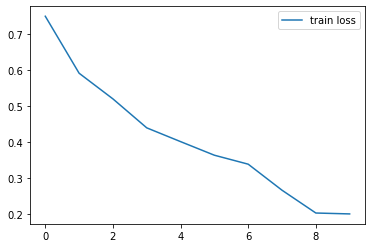

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_VGGnet')

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 40.8 MB/s eta 0:00:00


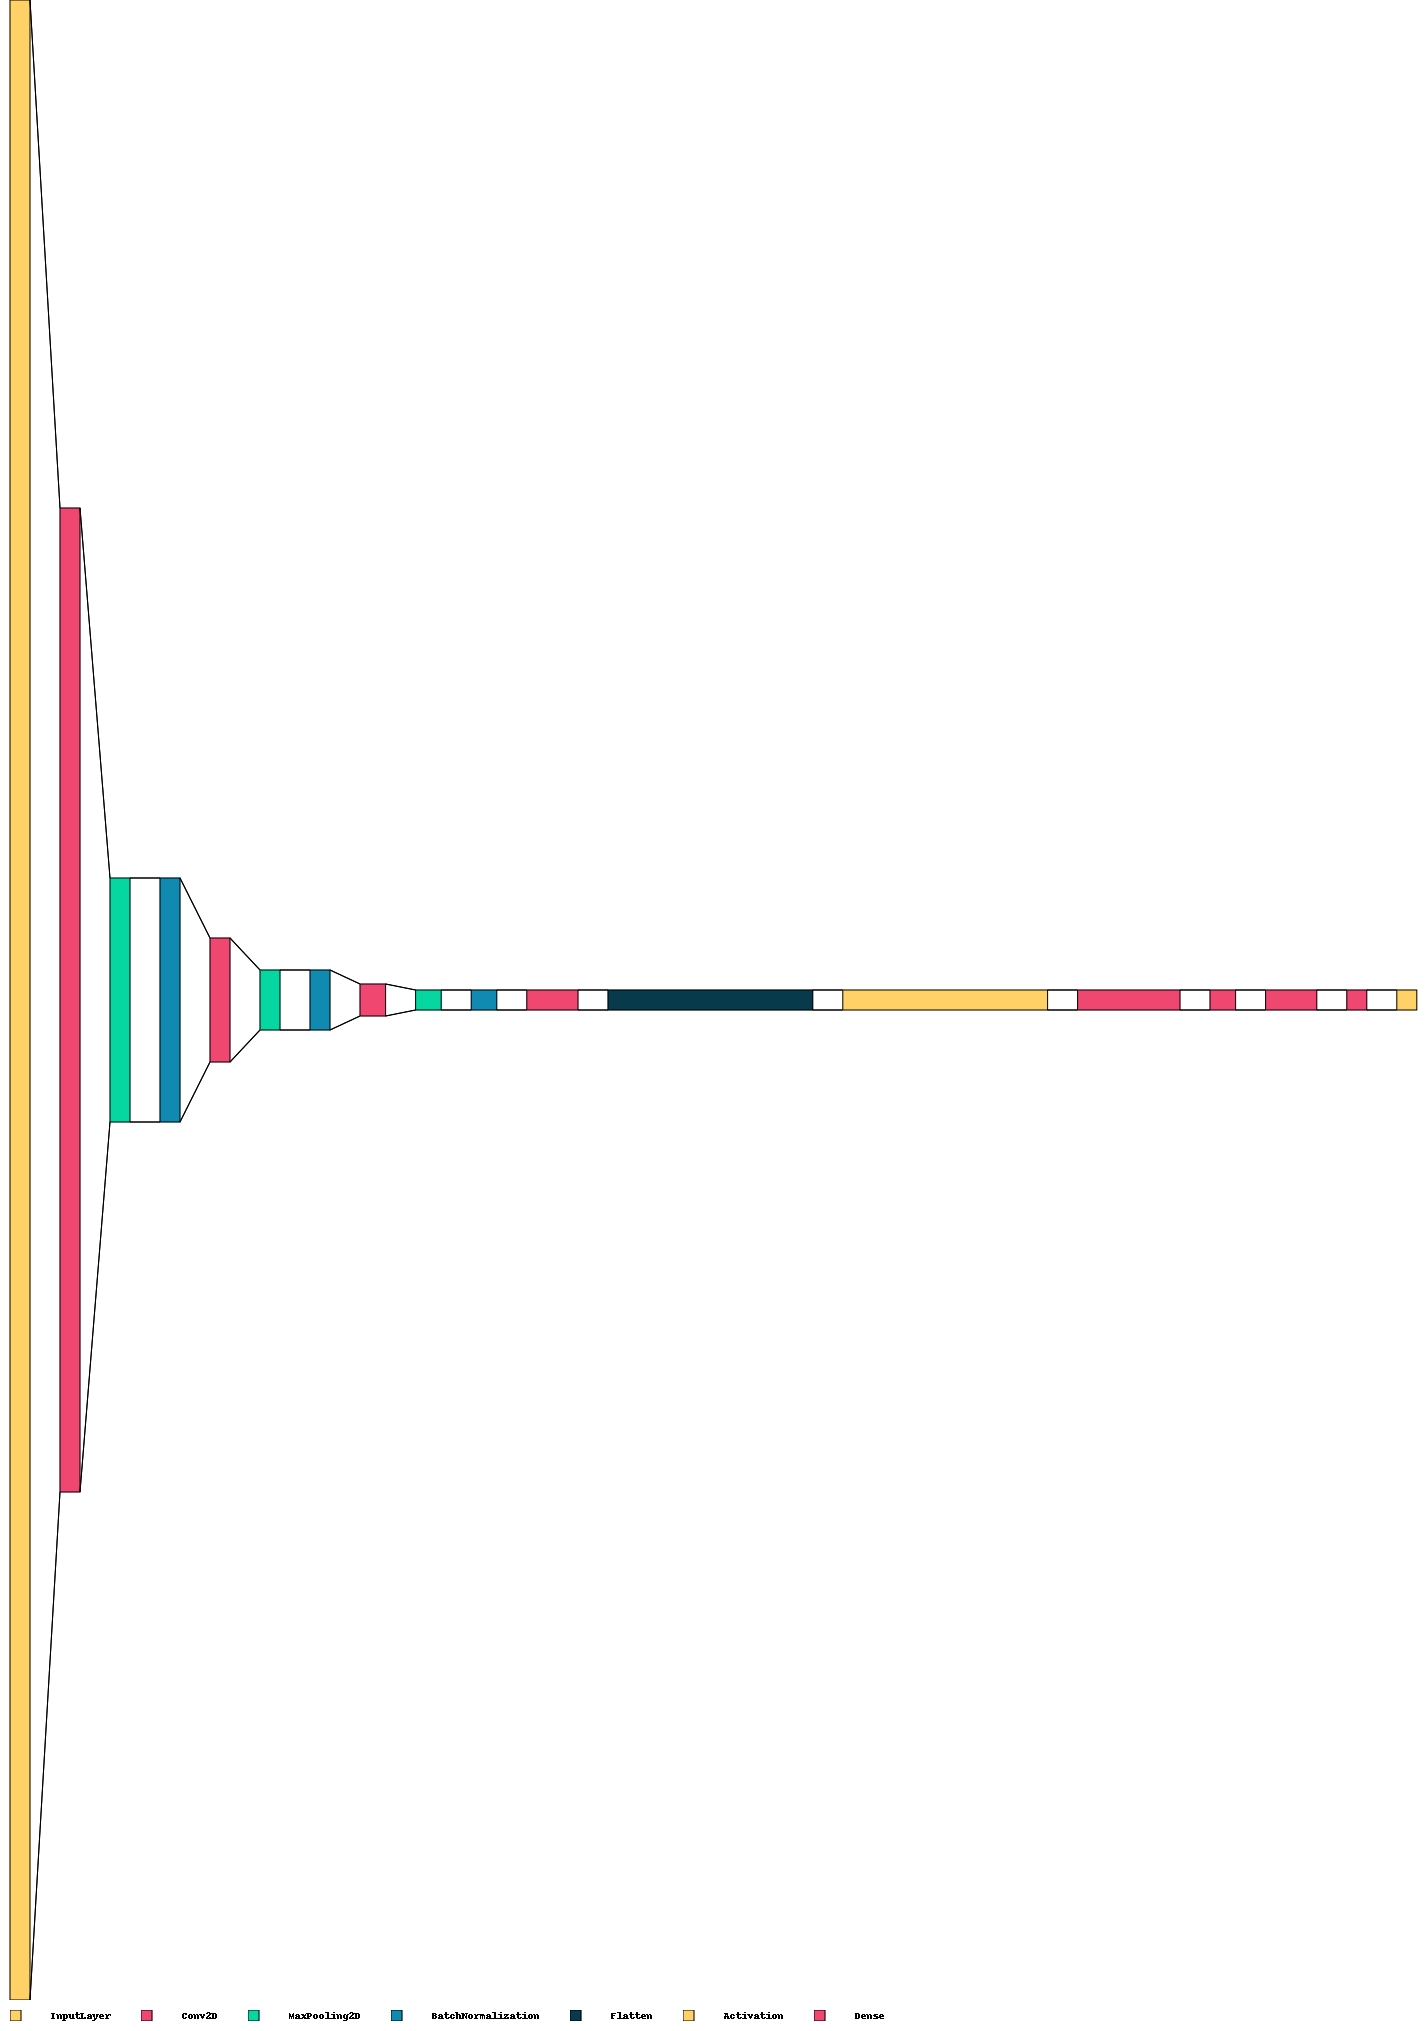

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True,draw_volume=True) # without custom font


In [ ]:
label_pred_keras = model.predict(test_images)
print(label_pred_keras)

10/20 [==============>...............] - ETA: 8s

KeyboardInterrupt: ignored

In [ ]:
label_pred_keras = model.predict(test_images[100][None,...])
print(label_pred_keras)

1/1 [==============================] - 0s 18ms/step
[[0.36393273 0.00265445 0.63341284]]


In [ ]:
final_class = np.unravel_index(label_pred_keras.argmax(),label_pred_keras.shape)
if final_class[1] == 0:
  print("meningioma")
elif final_class[1] == 1:
  print("glioma")
else:
  print("pituitary")

pituitary


In [ ]:
test_labels[100]

2

In [ ]:
model.save('self_CNN.h5')

In [ ]:
!cp "/content/self_CNN.h5" "/content/drive/MyDrive/Final_year_project/Pri"